# 2023-08-24 3 - Results Reformer

Plots the results from wandb runs on the constrained `Reformer` model. 

Copy of `Results.ipynb` run by Javier, using the runs in `Autoformer` wandb.

```python
loss = ((multipliers + 1/self.args.pred_len) * loss_all).sum()

```

## Fetching runs

In [87]:
import wandb
from math import isnan 
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import wandb
from tqdm import tqdm
# from cycler import cycler
import matplotlib as mpl
api = wandb.Api()
project = "Autoformer"
workspace = "alelab"
experiment_run_name_suffix="-newloss"

sweep_id = "sij8fsl6" # leave none to analyze non sweep runs.

runs = api.runs(f"{workspace}/{project}")
all_runs = []
for run in tqdm(runs):
    if run.State=="finished":
        for split in ["train", "test"]:
            for metric in ["mse",]:
                pred_len = run.config["pred_len"]
                metrics = np.zeros(pred_len)
                if ((run.name.startswith("Constrained-10e/weather.csv") and run.config["dual_lr"]==0.01 and run.config["dual_init"]==1.0 and run.config['model']=='Reformer' and run.sweep.id==sweep_id) or \
                    (run.name.startswith("ERM/weather.csv") and run.config['model']=='Reformer' and run.sweep.id=="3y11r5f6"  )):
                # if (run.name==f"Resilient{experiment_run_name_suffix}" and run.config["resilient_alpha"]==1 and run.config["resilient_beta"]==2 and run.config["resilient_lr"]==0.001) or 
                # (run.name==f"Constrained{experiment_run_name_suffix}" and run.config["dual_lr"]==0.01 and run.config["dual_init"]==1.0) or run.name==f"ERM{experiment_run_name_suffix}":
                    for i in range(pred_len):
                        run_dict = {**run.config}
                        #run_dict["constraint_level"] = constraint_level
                        run_dict[f"{metric}"] = run.summary[f"{metric}/{split}/{i}"]
                        run_dict["step"]=i
                        run_dict["split"] = split
                        run_dict["run_id"] = run.id
                        # Get either Constrained/ or ERM/ from the run name, then append model name.
                        #print("run.name", run.name)
                        #debug if ERM run
                        run_dict["Algorithm"] = f"{run.name.split('/')[0]} {run.config['model']}"
                        run_dict["sweep_id"] = run.sweep.id
                        #print("Algorithm", run_dict["Algorithm"])
                        all_runs.append(run_dict)

df = pd.DataFrame(all_runs)

100%|██████████| 224/224 [00:13<00:00, 16.16it/s]


In [90]:
ddd=df[(df.Algorithm=="Constrained-10e Reformer") & (df.constraint_level==0.55) & (df.pred_len==192)]
ddd.run_id.unique()

array(['eoz7hwba'], dtype=object)

In [96]:
df[['run_id',"sweep_id",'Algorithm','constraint_level','pred_len']].drop_duplicates().sort_values(["pred_len","constraint_level"])

,run_id,sweep_id,Algorithm,constraint_level,pred_len
2496,x29y8bun,3y11r5f6,ERM Reformer,-1.00,96
7872,hiuetr9l,sij8fsl6,Constrained-10e Reformer,0.45,96
10560,ambs1di1,sij8fsl6,Constrained-10e Reformer,0.50,96
5184,omh9kk3z,sij8fsl6,Constrained-10e Reformer,0.55,96
2112,pcpwgpwz,3y11r5f6,ERM Reformer,-1.00,192
7488,2lnq0mke,sij8fsl6,Constrained-10e Reformer,0.45,192
10176,wyqih26w,sij8fsl6,Constrained-10e Reformer,0.50,192
4800,eoz7hwba,sij8fsl6,Constrained-10e Reformer,0.55,192
1440,pjl7wozc,3y11r5f6,ERM Reformer,-1.00,336
6816,g3tc49dd,sij8fsl6,Constrained-10e Reformer,0.45,336


## Plotting results

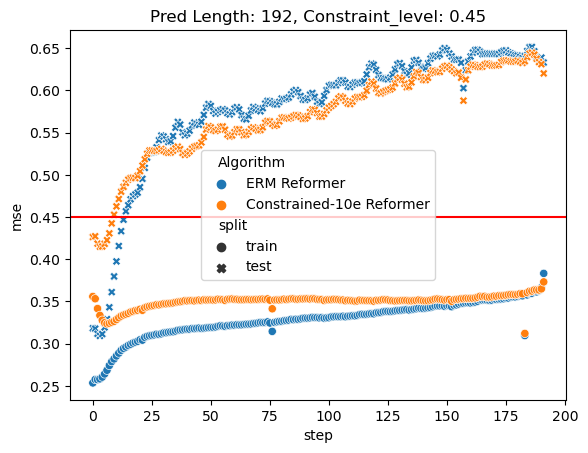

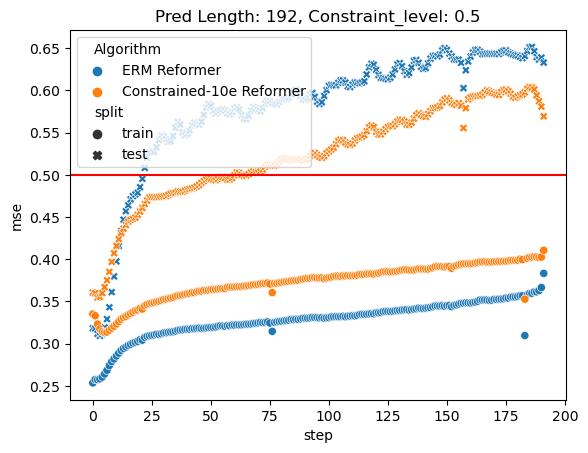

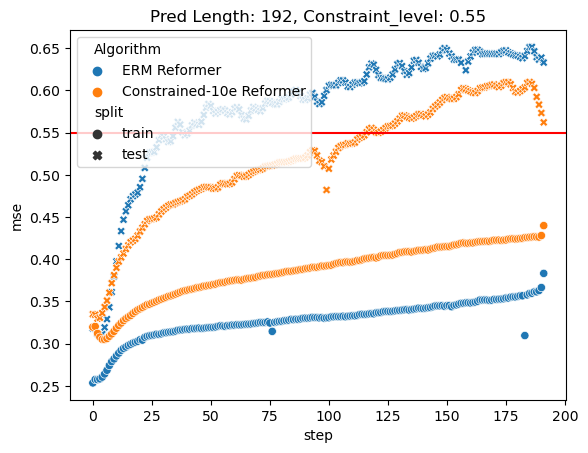

In [100]:
for pred_len, series in df.groupby("pred_len"):
    if pred_len==192: # why? 
        for constraint_level in [0.45,0.5,0.55]:
            plot_series = series[series["constraint_level"].isin([constraint_level,-1.0])]
            sns.scatterplot(x="step", y="mse", hue="Algorithm",style="split", data=plot_series)
            plt.axhline(y=constraint_level, color='r', linestyle='-')
            plt.title(f"Pred Length: {pred_len}, Constraint_level: {constraint_level}")
            plt.show()

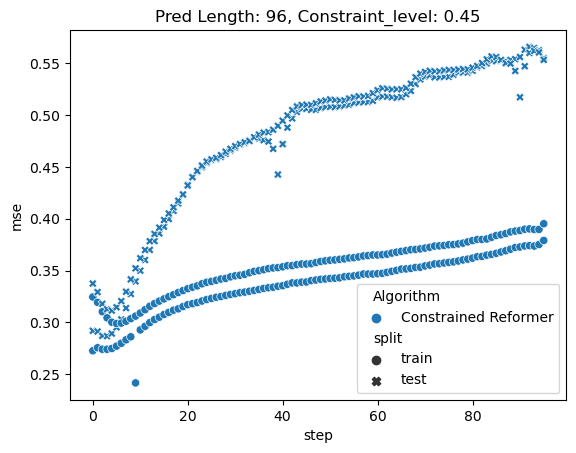

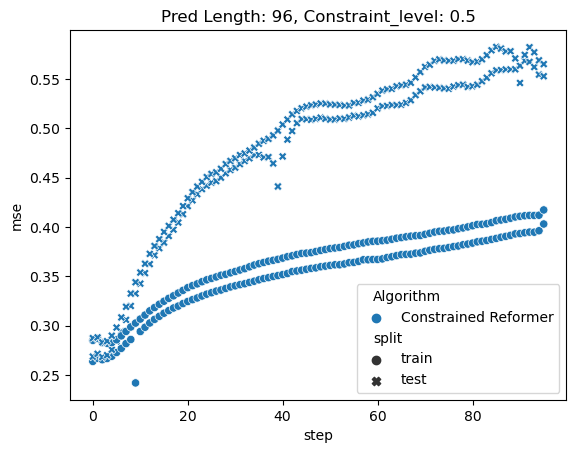

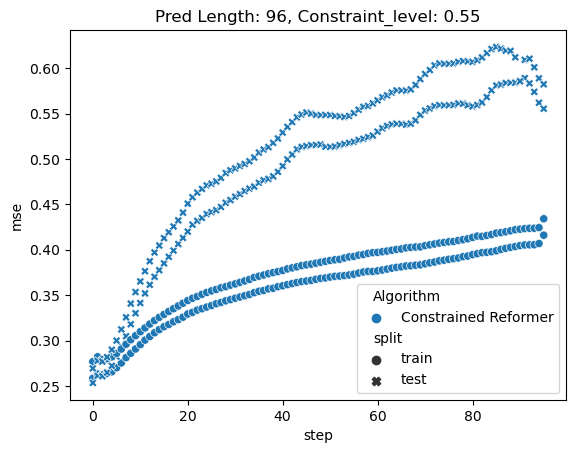

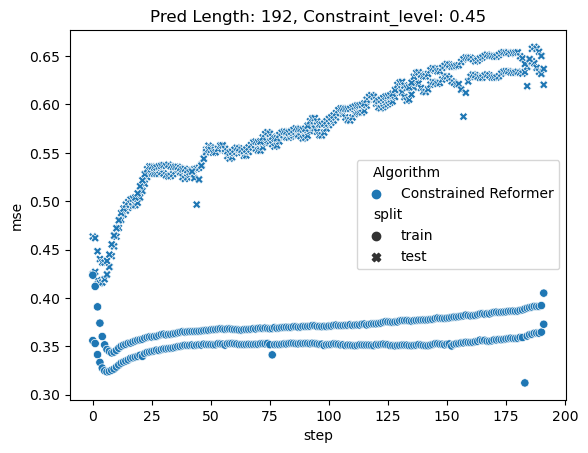

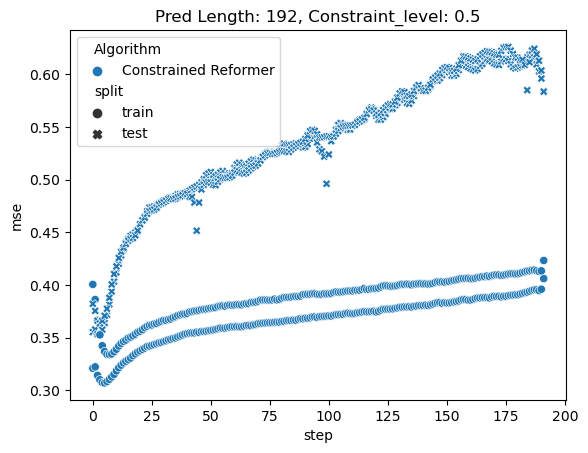

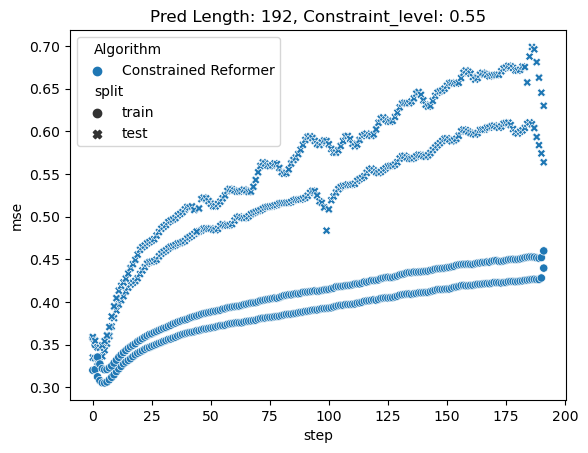

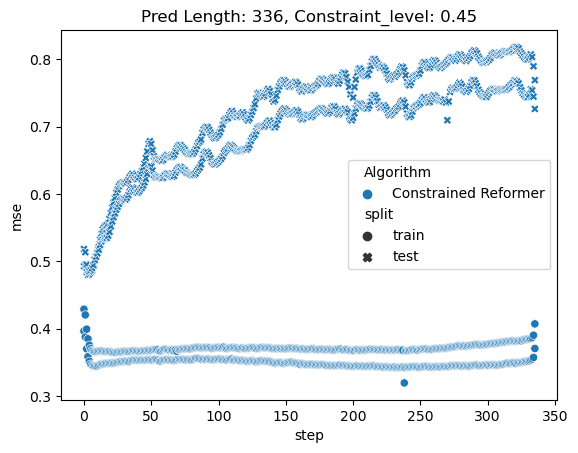

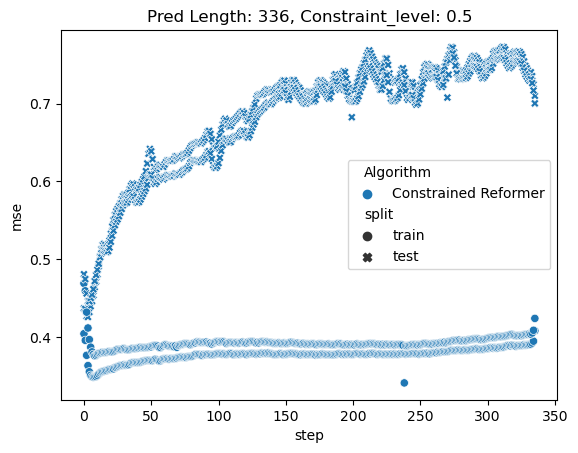

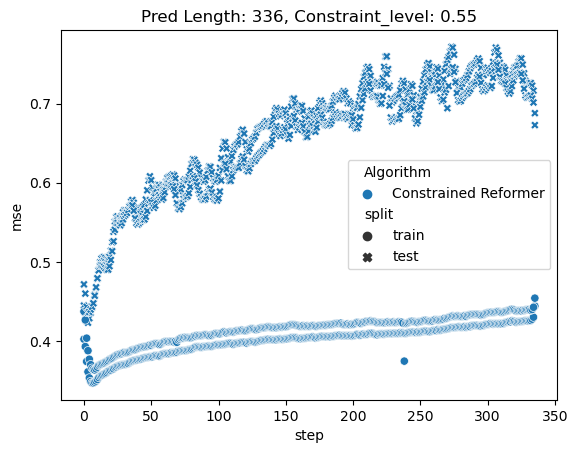

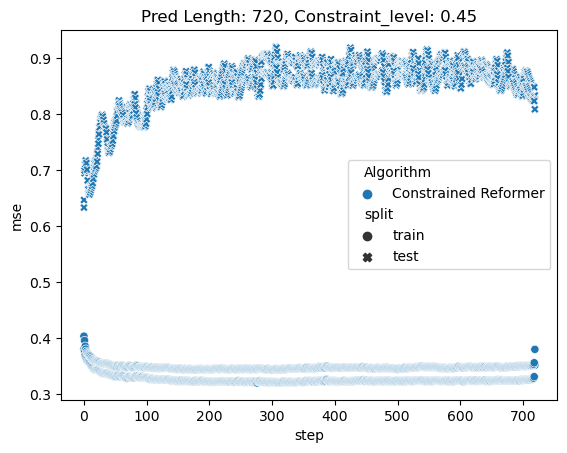

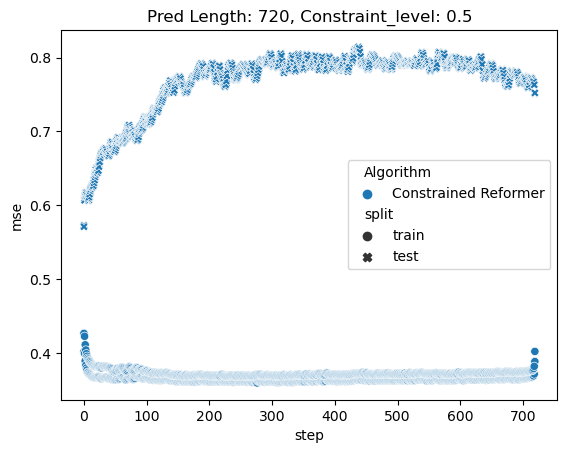

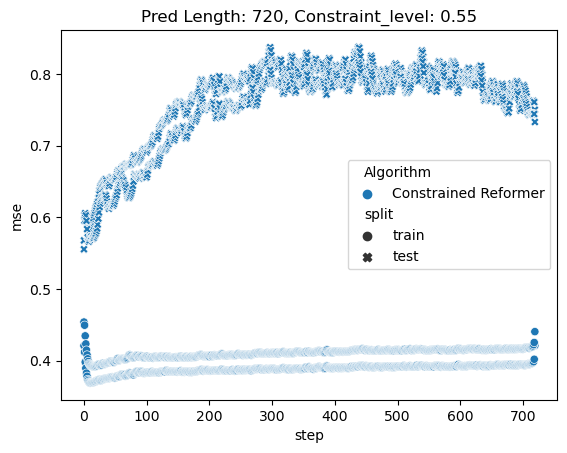

In [25]:
for pred_len, series in df.groupby("pred_len"):
    for constraint_level in [0.45, 0.5, 0.55]:
        plot_series = series[series["constraint_level"].isin([constraint_level, 0, 0.4])]
        sns.scatterplot(x="step", y="mse", hue="Algorithm",style="split", data=plot_series)
        plt.title(f"Pred Length: {pred_len}, Constraint_level: {constraint_level}")
        plt.show()